In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

data = pd.read_csv('Brix_Pinot.csv', header=1)

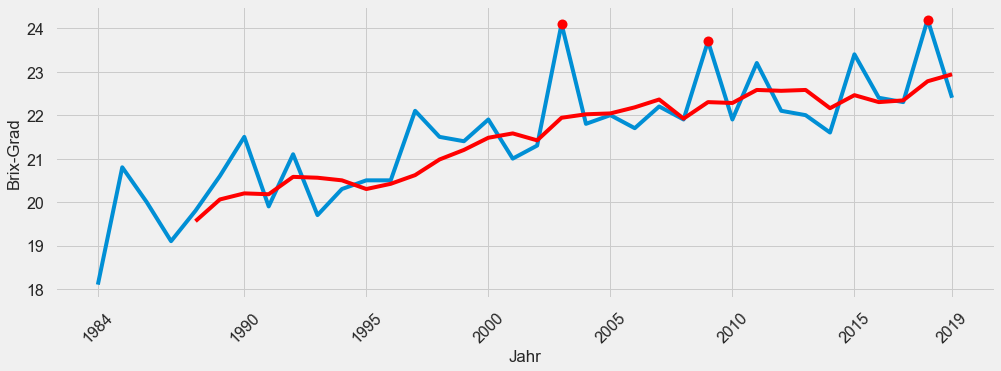

In [156]:
plt.style.use('fivethirtyeight')

#plot = data.plot(x='Year', y=(['Durchschnitt','ZH','SH','SG','VS','AG','TG']), kind = 'line',figsize=(15,5),legend=True)
fig = data.plot(x='Year', y=(['Durchschnitt']), kind = 'line',figsize=(15,5),legend=False)
fig.set_ylabel('Brix-Grad')
fig.set_xlabel('Jahr')
plt.xticks([1984,1990,1995,2000,2005,2010,2015,2019]) 
fig.tick_params(axis ='x', rotation = 45)
plt.plot(2003, 24.1 ,marker='.',color='red',ms=20)
plt.plot(2009, 23.7 ,marker='.',color='red',ms=20)
plt.plot(2018, 24.2 ,marker='.',color='red',ms=20)
rolling_mean = data['Durchschnitt'].rolling(window=5).mean()
plt.plot(data['Year'], rolling_mean, label='Rolling Mean 5 Years', color='red')
plt.show()

#plt.savefig('Brix_Average.png', bbox_inches='tight')


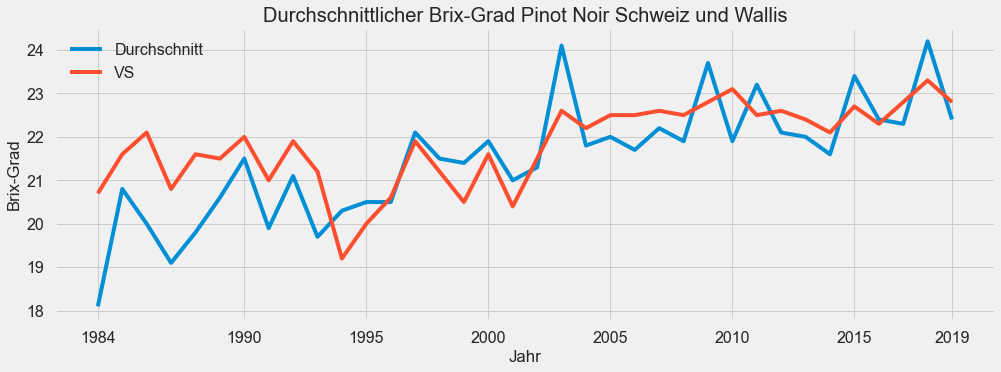

In [266]:
plt.style.use('fivethirtyeight')

fig = data.plot(x='Year', y=(['Durchschnitt','TI']), kind = 'line',figsize=(15,5),legend=True)

fig.set_ylabel('Brix-Grad')
fig.set_title('Durchschnittlicher Brix-Grad Pinot Noir Schweiz und Wallis')
fig.set_xlabel('Jahr')
plt.xticks([1984,1990,1995,2000,2005,2010,2015,2019]) 
fig.tick_params(axis ='x')

plt.show()

In [106]:
data.mean()

Year            2001.500000
Durchschnitt      21.500000
ZH                20.961111
SH                21.430556
SG                21.713889
GR                22.672222
TG                20.858333
VS                21.822222
VD                21.566667
NE                20.997222
GE                 9.763889
dtype: float64

In [119]:
# Climate

response = requests.get('https://www.meteoschweiz.admin.ch/product/input/climate-data/swissmean/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt')

file_object = io.StringIO(response.content.decode('utf-8'))
temp = pd.read_csv(file_object, sep='\t', skiprows=15)

print(temp.head)

<bound method NDFrame.head of      time   jan   feb   mar   apr    may    jun    jul    aug    sep   oct  \
0    1864 -7.10 -4.52  0.04  2.11   7.43   9.48  12.37  10.95   8.59  3.50   
1    1865 -3.47 -6.25 -5.91  7.03  10.09  10.98  13.99  11.16  11.90  5.19   
2    1866 -1.31 -0.42 -1.00  4.11   4.95  12.02  12.25   9.98   9.70  5.34   
3    1867 -3.87  0.56 -0.13  3.49   7.74  10.57  11.29  12.93  10.43  2.92   
4    1868 -5.46 -1.53 -2.30  2.33  12.04  11.97  12.89  12.50  11.12  4.76   
..    ...   ...   ...   ...   ...    ...    ...    ...    ...    ...   ...   
152  2016 -1.10 -0.19  0.14  4.57   7.88  11.97  15.09  14.80  12.54  5.38   
153  2017 -5.15  0.46  4.11  4.42   9.80  15.18  15.05  15.45   8.65  7.78   
154  2018  0.48 -5.21 -0.21  7.81  10.43  13.81  16.24  15.89  12.56  8.04   
155  2019 -4.37  0.73  2.27  4.47   6.08  15.25  16.21  15.10  11.37  8.45   
156  2020 -0.28  1.62  1.53  7.62    NaN    NaN    NaN    NaN    NaN   NaN   

      nov   dec   djf   mam    jj

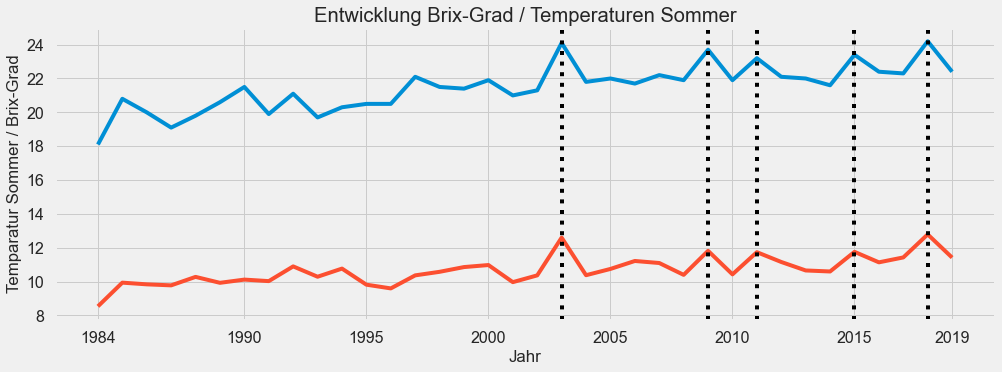

In [242]:
fig = data.plot(x='Year', y=(['Durchschnitt']), kind = 'line',figsize=(15,5),legend=False)
fig.set_ylabel('Temparatur Sommer / Brix-Grad')
fig.set_xlabel('Jahr')
plt.xticks([1984,1990,1995,2000,2005,2010,2015,2019]) 
fig.tick_params(axis ='x') #rotation = 45
fig.set_title('Entwicklung Brix-Grad / Temperaturen Sommer')
plt.plot(temp.loc[120:155,'time'],temp.loc[120:155,'summer'])
#plt.plot(2003, 24.1 ,marker='.',color='red',ms=20)
#plt.plot(2009, 23.7 ,marker='.',color='red',ms=20)
#plt.plot(2018, 24.2 ,marker='.',color='red',ms=20)
plt.axvline(x=2003,color='black',linestyle='dotted')
plt.axvline(x=2009,color='black',linestyle='dotted')
plt.axvline(x=2011,color='black',linestyle='dotted')
plt.axvline(x=2015,color='black',linestyle='dotted')
plt.axvline(x=2018,color='black',linestyle='dotted')

plt.show()

In [68]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [203]:
mean = float(temp.loc[97:126,['year']].mean())
temp['avg'] = temp['year']-mean

In [232]:
temp.loc[0,'time']

1864

In [174]:
temp.loc[:,'year'][0]-temp.loc[97:126,['year']].mean()

year   -1.414667
dtype: float64

In [255]:
lug = pd.read_csv('Data/homog_mo_LUG.txt', skiprows=27, delim_whitespace=True)

In [263]:
lugg = lug.groupby('Year')['Precipitation'].mean().reset_index()


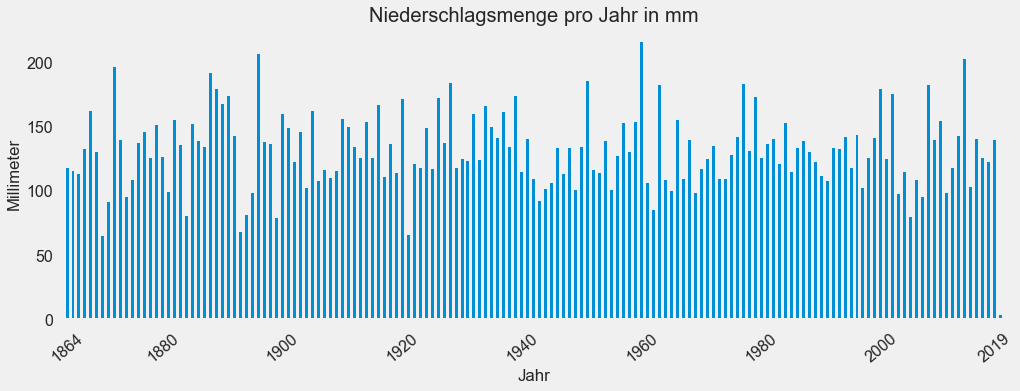

In [267]:
fig = lugg.plot(x=('Year'), y=(['Precipitation']), kind = 'bar',figsize=(15,5),legend=False)
fig.set_ylabel('Millimeter')
fig.set_title('Niederschlagsmenge pro Jahr in mm')
fig.set_xlabel('Jahr')
plt.xticks([0,16,36,56,76,96,116,136,155],[temp.loc[0,'time'],temp.loc[16,'time'],temp.loc[36,'time'],temp.loc[56,'time'],temp.loc[76,'time'],temp.loc[96,'time'],temp.loc[116,'time'],temp.loc[136,'time'],temp.loc[155,'time']]) 
fig.grid(False)
fig.tick_params(axis ='x', rotation = 40)

plt.show()

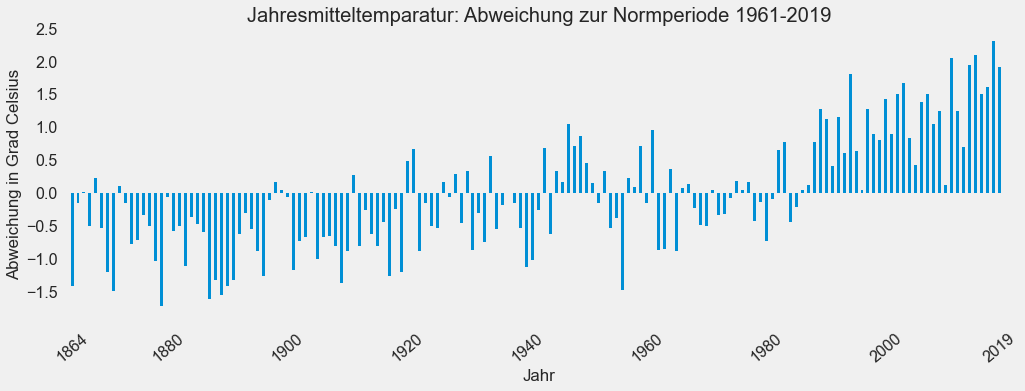

In [241]:
fig = temp.plot(x=('time'), y=(['avg']), kind = 'bar',figsize=(15,5),legend=False)
fig.set_ylabel('Abweichung in Grad Celsius')
fig.set_title('Jahresmitteltemparatur: Abweichung zur Normperiode 1961-2019')
fig.set_xlabel('Jahr')
fig.grid(False)
plt.xticks([0,16,36,56,76,96,116,136,155],[temp.loc[0,'time'],temp.loc[16,'time'],temp.loc[36,'time'],temp.loc[56,'time'],temp.loc[76,'time'],temp.loc[96,'time'],temp.loc[116,'time'],temp.loc[136,'time'],temp.loc[155,'time']]) 
fig.tick_params(axis ='x', rotation = 40)

plt.show()